In [22]:
import os
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")
sns.set_palette("Set2")


In [61]:
BASE_DIR = os.getcwd()
LOGS_DIR = "../Logs/"
MOBILE_NET_V2_DIR = "MobileNetV2"
USER_1_8 = "user1-8.joblib"
USER_8_16 = "user8-16.joblib"
USER_16_25 = "user16-25.joblib"

In [62]:
path_1_8 = os.path.join(BASE_DIR, LOGS_DIR, MOBILE_NET_V2_DIR, USER_1_8)
data_1_8 = joblib.load(path_1_8)

path_8_16 = os.path.join(BASE_DIR, LOGS_DIR, MOBILE_NET_V2_DIR, USER_8_16)
data_8_16 = joblib.load(path_8_16)

path_16_25 = os.path.join(BASE_DIR, LOGS_DIR, MOBILE_NET_V2_DIR, USER_16_25)
data_16_25 = joblib.load(path_16_25)

In [63]:
ACC = data_1_8["accuracy"] + data_8_16["accuracy"] + data_16_25["accuracy"]
CM = data_1_8["cm"] + data_8_16["cm"] + data_16_25["cm"]

In [64]:
CM = np.array(CM, dtype="int64")

In [65]:
avg_cm = np.mean(CM, axis=0)
avg_acc = np.mean(ACC)

([], [])

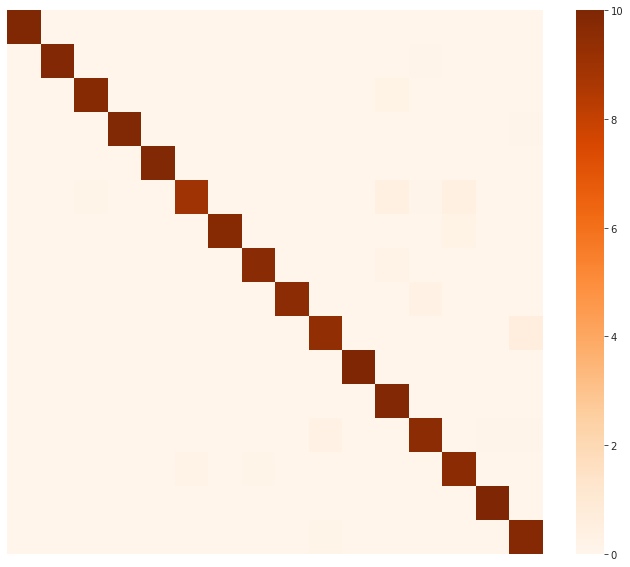

In [66]:
plt.figure(figsize=(12, 10))
sns.heatmap(avg_cm, cmap="Oranges")
plt.xticks([])
plt.yticks([])

In [67]:
TP = np.diag(avg_cm)
FP = np.sum(avg_cm, axis=0) - TP
FN = np.sum(avg_cm, axis=1) - TP

num_classes = 16
TN = []
for i in range(num_classes):
    temp = np.delete(avg_cm, i, 0)    # delete ith row
    temp = np.delete(temp, i, 1)  # delete ith column
    TN.append(sum(sum(temp)))

precision = TP/(TP+FP)
recall = TP/(TP+FN)
specificity = TN/(TN+FP)
f1 = 2 * (precision * recall) / (precision + recall)

In [68]:
metrics = pd.DataFrame()
metrics["Precision"] = precision
metrics["Recall"] = recall
metrics["Specificity"] = specificity
metrics["F1"] = f1

In [69]:
metrics

,Precision,Recall,Specificity,F1
0,1.000000,0.996,1.000000,0.997996
1,1.000000,0.988,1.000000,0.993964
2,0.983871,0.976,0.998933,0.979920
3,0.988048,0.992,0.999200,0.990020
4,0.995984,0.992,0.999733,0.993988
5,0.965517,0.896,0.997867,0.929461
6,1.000000,0.976,1.000000,0.987854
7,0.979757,0.968,0.998667,0.973843
8,1.000000,0.960,1.000000,0.979592
9,0.955285,0.940,0.997067,0.947581


In [70]:
print(f"Average Accuracy: {avg_acc}")

Average Accuracy: 97.34999895095825


In [71]:
ACC

[99.37499761581421,
 96.24999761581421,
 98.7500011920929,
 73.1249988079071,
 93.12499761581421,
 93.75,
 99.37499761581421,
 94.9999988079071,
 100.0,
 96.875,
 99.37499761581421,
 99.37499761581421,
 99.37499761581421,
 98.7500011920929,
 99.37499761581421,
 100.0,
 100.0,
 100.0,
 99.37499761581421,
 99.37499761581421,
 100.0,
 98.1249988079071,
 94.9999988079071,
 100.0,
 100.0]